In [259]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

%matplotlib inline

low_memory=False

pd.set_option('use_inf_as_na', True)

bomMovieGross = pd.read_csv('zippedData/bom.movie_gross.csv.gz')

imdbNameBasics = pd.read_csv('zippedData/imdb.name.basics.csv.gz')

imdbTitleAkas = pd.read_csv('zippedData/imdb.title.akas.csv.gz')

imdbTitleBasics = pd.read_csv('zippedData/imdb.title.basics.csv.gz')

imdbTitleCrew = pd.read_csv('zippedData/imdb.title.crew.csv.gz')

imdbTitlePrincipals = pd.read_csv('zippedData/imdb.title.principals.csv.gz')

imdbTitleRatings = pd.read_csv('zippedData/imdb.title.ratings.csv.gz')

rtMovieInfo = pd.read_csv('zippedData/rt.reviews.tsv.gz', sep='\t', encoding='windows-1252')

rtReviews = pd.read_csv('zippedData/rt.reviews.tsv.gz', sep='\t', encoding='windows-1252')

tmdbMovies = pd.read_csv('zippedData/tmdb.movies.csv.gz')

tnMovieBudgets = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')

kaggleMovies = pd.read_csv('movies_metadata.csv')

C:\Users\Chris\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [260]:
allFiles = [bomMovieGross, imdbNameBasics, imdbTitleBasics, imdbTitleAkas, imdbTitleCrew, imdbTitlePrincipals, imdbTitleRatings,
           rtMovieInfo, rtReviews, tmdbMovies, tnMovieBudgets]

In [261]:
allCols = list(map(lambda x: x.columns, allFiles))
allCols

[Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object'),
 Index(['nconst', 'primary_name', 'birth_year', 'death_year',
        'primary_profession', 'known_for_titles'],
       dtype='object'),
 Index(['tconst', 'primary_title', 'original_title', 'start_year',
        'runtime_minutes', 'genres'],
       dtype='object'),
 Index(['title_id', 'ordering', 'title', 'region', 'language', 'types',
        'attributes', 'is_original_title'],
       dtype='object'),
 Index(['tconst', 'directors', 'writers'], dtype='object'),
 Index(['tconst', 'ordering', 'nconst', 'category', 'job', 'characters'], dtype='object'),
 Index(['tconst', 'averagerating', 'numvotes'], dtype='object'),
 Index(['id', 'review', 'rating', 'fresh', 'critic', 'top_critic', 'publisher',
        'date'],
       dtype='object'),
 Index(['id', 'review', 'rating', 'fresh', 'critic', 'top_critic', 'publisher',
        'date'],
       dtype='object'),
 Index(['Unnamed: 0', 'genre_ids', 'id', 'origin

In [262]:
def inflate(amountOfMoney, year):
    yearsOfInflation = 2021 - year
    amountOfMoney    = amountOfMoney - (amountOfMoney * (yearsOfInflation * .02))
    return amountOfMoney

In [263]:
inflate(100, 1980)

18.0

In [264]:
kaggleMovies.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [272]:
kaggleMovies['budget'] = pd.to_numeric(kaggleMovies['budget'], errors='coerce')
kaggleMovies['popularity'] = pd.to_numeric(kaggleMovies['popularity'], errors='coerce')
# kaggleMovies['release_date'] = pd.to_datetime(kaggleMovies['release_date'], format='%Y-%m-%d')
# kaggleMovies['release_date'] = kaggleMovies['release_date'].astype('datetime64[D]')
kaggleMovies['percent returns'] = kaggleMovies['revenue'] / kaggleMovies['budget']
kaggleMovies.replace(np.inf, np.nan)

# kaggleMovies.corr()
kaggleMovies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45463 non-null  float64
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45460 non-null  float64
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [269]:
# pd.DataFrame(kaggleMovies['genres'].value_counts())
#there are only 9 adult movies, useless
#4069 disticnt genre entries, 2442 blank as []


kaggleMovies.corr()

,budget,popularity,revenue,runtime,vote_average,vote_count,percent returns
budget,1.000000,0.449645,0.768776,0.134733,0.073494,0.676642,-0.012564
popularity,0.449645,1.000000,0.506179,0.129927,0.154399,0.559965,-0.003939
revenue,0.768776,0.506179,1.000000,0.103917,0.083868,0.812022,-0.005508
runtime,0.134733,0.129927,0.103917,1.000000,0.158146,0.113539,-0.005188
vote_average,0.073494,0.154399,0.083868,0.158146,1.000000,0.123607,0.013160
vote_count,0.676642,0.559965,0.812022,0.113539,0.123607,1.000000,-0.003032
percent returns,-0.012564,-0.003939,-0.005508,-0.005188,0.013160,-0.003032,1.000000


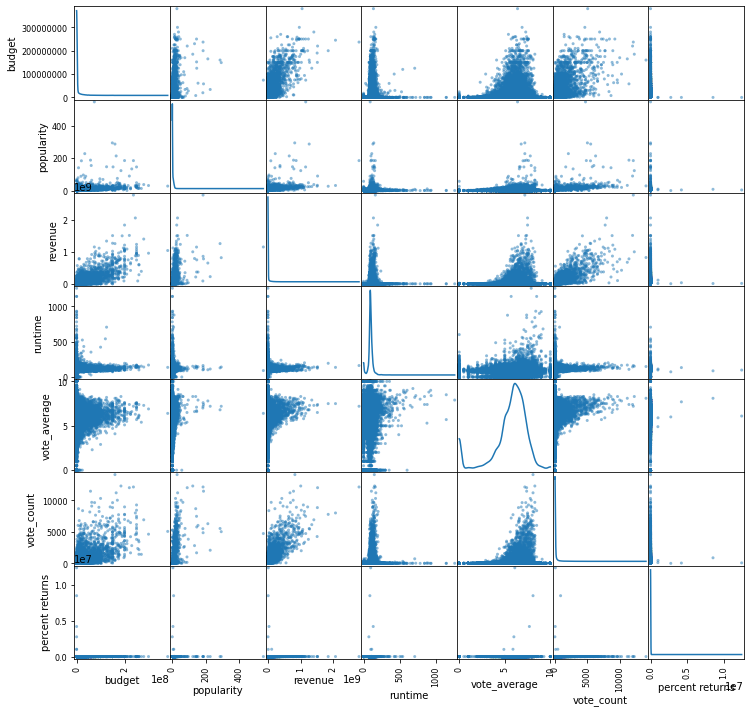

In [268]:
kagInfo = pd.DataFrame(kaggleMovies[['budget', 'revenue', 'popularity', 'runtime', 'vote_average', 'vote_count']])
pd.plotting.scatter_matrix(kaggleMovies, figsize=(12,12), diagonal='kde');

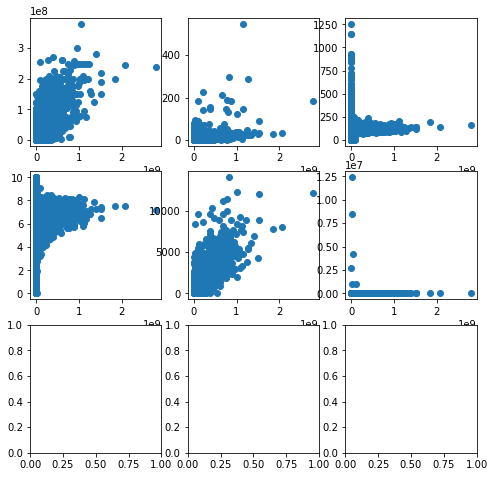

In [270]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(8,8))
ax[0][0].scatter(kaggleMovies['revenue'], kaggleMovies['budget'])
ax[0][1].scatter(kaggleMovies['revenue'], kaggleMovies['popularity'])
ax[0][2].scatter(kaggleMovies['revenue'], kaggleMovies['runtime'])
ax[1][0].scatter(kaggleMovies['revenue'], kaggleMovies['vote_average'])
ax[1][1].scatter(kaggleMovies['revenue'], kaggleMovies['vote_count'])
ax[1][2].scatter(kaggleMovies['revenue'], kaggleMovies['percent returns'] )

In [103]:
# bomMovieGross

In [104]:
moviesPerStudioPerYear = bomMovieGross.groupby(['year', 'studio']).count()

In [105]:
# imdbNameBasics

In [106]:
# imdbTitleAkas

In [107]:
# imdbTitleBasics

In [108]:
# imdbTitleCrew

In [109]:
# imdbTitlePrincipals

In [110]:
# imdbTitleRatings

In [111]:
# rtMovieInfo

In [112]:
# rtReviews

In [113]:
# tmdbMovies

In [114]:
# tnMovieBudgets

In [244]:

# Removes commas and dollar signs, converts to int

# tnMovieBudgets['worldwide_gross']   = list(map(lambda x: int(x.replace(',','').replace('$','')), tnMovieBudgets['worldwide_gross']))

# tnMovieBudgets['domestic_gross']    = list(map(lambda x: int(x.replace(',','').replace('$','')), tnMovieBudgets['domestic_gross']))

# tnMovieBudgets['production_budget'] = list(map(lambda x: int(x.replace(',','').replace('$','')), tnMovieBudgets['production_budget']))

tnMovieBudgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000,0,0
5778,79,"Apr 2, 1999",Following,6000,48482,240495
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0


In [245]:
tnPercentReturns =pd.DataFrame(tnMovieBudgets['worldwide_gross'] / tnMovieBudgets['production_budget'])
tnPercentReturns



,0
0,6.532577
1,2.546673
2,0.427892
3,4.243841
4,4.153696
...,...
5777,0.000000
5778,40.082500
5779,0.267600
5780,0.000000


In [246]:
# usable data
# func. inflate(amountOfMoney, year) cuts the value by 2% every year it is old.

# moviesPerStudioPerYear
# percentReturnOverBudget
returnOverBudgetAndEntryCost = percentReturnOverBudget.join(tnMovieBudgets['production_budget'])
# fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(25,25))
# ax[0][0].scatter(x=returnOverBudgetAndEntryCost['Percent Returns'],y = returnOverBudgetAndEntryCost['production_budget'])
returnOverBudgetAndEntryCost.loc[:,['Percent Returns', 'production_budget']].plot('production_budget','Percent Returns',kind = 'hist')

NameError: name 'percentReturnOverBudget' is not defined

In [118]:
fin = pd.DataFrame(data = tnMovieBudgets['movie'])
finaldf = fin.join(tnPercentReturns)
percentReturnOverBudget = finaldf.rename(columns = {0:'Percent Returns'}).sort_values('Percent Returns', ascending = False)
# finaldf.set_index('Percent Returns') 
percentReturnOverBudget

NameError: name 'tnPercentReturns' is not defined

In [119]:
# imdbConcise = pd.concat[imdbTitleAkas, imdbTitleBasics, imdbTitleCrew, imdbTitlePrincipals, imdbTitleRatings]
# imdbNameBasics.set_index
imdbConcise1 = imdbTitleBasics.join(imdbTitleRatings, rsuffix = 'rateData')
imdbConcise1

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,tconstrateData,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",tt10356526,8.3,31.0
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",tt10384606,8.9,559.0
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,tt1042974,6.4,20.0
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",tt1043726,4.2,50352.0
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",tt1060240,6.5,21.0
...,...,...,...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama,NaN,NaN,NaN
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary,NaN,NaN,NaN
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy,NaN,NaN,NaN
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN,NaN,NaN,NaN


In [120]:
imdbConcise2 = imdbConcise1.join(imdbTitleAkas, rsuffix = 'akasData')
imdbConcise2

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,tconstrateData,averagerating,numvotes,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",tt10356526,8.3,31.0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",tt10384606,8.9,559.0,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,tt1042974,6.4,20.0,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",tt1043726,4.2,50352.0,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",tt1060240,6.5,21.0,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama,NaN,NaN,NaN,tt4045476,4,Burning Love 2,NaN,NaN,original,NaN,1.0
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary,NaN,NaN,NaN,tt4045476,5,Égető szerelem 2.,HU,NaN,NaN,NaN,0.0
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy,NaN,NaN,NaN,tt4047074,1,Scrap Girl,CH,NaN,NaN,NaN,0.0
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN,NaN,NaN,NaN,tt4047114,1,Flesh Eating Bastards,US,NaN,NaN,NaN,0.0
